In [1]:
import opfLibrary as cl

In [2]:
import pandas as pd
import numpy as np
from numpy import nan
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
#np.set_printoptions(formatter={'float_kind':'{:f}'.forma})

# To increase size of the sns plots
sns.set(rc={'figure.figsize':(8,6)})

from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [3]:
query_string = 'qa2019b.sql'
query_string22 = 'qa2022b.sql'

In [4]:
qa_df = cl.execute_sql(query_string)

In [5]:
qa22_df = cl.execute_sql(query_string22)

Reading 2019 dataframe

In [6]:
qa_df.head()

,accountid,account_owner_name__c,business_type,number_of_opportunities,times_funded,times_renewed,time_in_business,AvgUWRev,AvgMaxOffers,MaxOffer,AvgFundingAmount,MaxFunding,AvgMCK1,AvgMCK3,L3_TimesDeclined,L3_TimesFunded,position_count,days_since_last_funding,last_opp_funded
0,001f100001P8bC9AAJ,Charles Rodriguez,EB,3,2,1,5.5,6250.0,5350.000000,6500.0,5350.0,6500.0,220.000000,NaN,1,2,1,105,1
1,001f100001VOhYeAAL,Lissette Lopez,EB,6,5,4,15.5,33500.0,22500.000000,35000.0,22500.0,35000.0,235.000000,NaN,0,3,6,97,1
2,0013Z00001cJUTFQA4,Stephanie Cruz,NB,2,1,0,4.1,51500.0,26000.000000,32000.0,20000.0,20000.0,227.500000,NaN,1,1,1,98,0
3,0013Z00001bMeBvQAK,Ileana Lleo,EB,3,2,1,4.6,155000.0,116666.666667,150000.0,125000.0,150000.0,271.666667,NaN,1,2,1,545,0
4,0013Z00001epvbGQAQ,Jorge Camacho,NB,2,1,0,5.9,200000.0,150000.000000,225000.0,75000.0,75000.0,240.000000,NaN,1,1,1,620,0


# Analyzing Data

Bar graph to view the data

In [7]:
qa_df.shape

(662, 19)

In [8]:
for column in qa_df:
    unique_vals = np.unique(qa_df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print(f'The number of values for feature {column} : {nr_values} -- {unique_vals}')
    else:
        print(f'The number of values for feature {column} : {nr_values}')

The number of values for feature accountid : 662
The number of values for feature account_owner_name__c : 59
The number of values for feature business_type : 2 -- ['EB' 'NB']
The number of values for feature number_of_opportunities : 18 -- [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 23]
The number of values for feature times_funded : 12 -- [ 1  2  3  4  5  6  7  8  9 10 11 12]
The number of values for feature times_renewed : 12 -- [ 0  1  2  3  4  5  6  7  8  9 10 11]
The number of values for feature time_in_business : 163
The number of values for feature AvgUWRev : 374
The number of values for feature AvgMaxOffers : 434
The number of values for feature MaxOffer : 160
The number of values for feature AvgFundingAmount : 399
The number of values for feature MaxFunding : 149
The number of values for feature AvgMCK1 : 290
The number of values for feature AvgMCK3 : 11 -- [  0. 315. 345. 375. 380. 410. 415. 445. 500. 520.  nan]
The number of values for feature L3_TimesDeclined : 3 --

In [9]:
qa_df.isnull().sum()

accountid                    0
account_owner_name__c        0
business_type                0
number_of_opportunities      0
times_funded                 0
times_renewed                0
time_in_business             0
AvgUWRev                     0
AvgMaxOffers                 0
MaxOffer                     0
AvgFundingAmount             0
MaxFunding                   0
AvgMCK1                      0
AvgMCK3                    650
L3_TimesDeclined             0
L3_TimesFunded               0
position_count               0
days_since_last_funding      0
last_opp_funded              0
dtype: int64

In [10]:
eb_df = qa_df[qa_df['AvgMCK1'] <= 500]

In [11]:
eb_df = qa_df[qa_df['business_type'] == "EB"]

In [12]:
eb_df.drop(['AvgMCK3'],axis=1, inplace=True)

In [13]:
eb_df.fillna(0, inplace=True)

In [14]:
eb_df.isnull().sum()

accountid                  0
account_owner_name__c      0
business_type              0
number_of_opportunities    0
times_funded               0
times_renewed              0
time_in_business           0
AvgUWRev                   0
AvgMaxOffers               0
MaxOffer                   0
AvgFundingAmount           0
MaxFunding                 0
AvgMCK1                    0
L3_TimesDeclined           0
L3_TimesFunded             0
position_count             0
days_since_last_funding    0
last_opp_funded            0
dtype: int64

In [15]:
eb_df.shape

(563, 18)

In [16]:
eb_df.columns

Index(['accountid', 'account_owner_name__c', 'business_type',
       'number_of_opportunities', 'times_funded', 'times_renewed',
       'time_in_business', 'AvgUWRev', 'AvgMaxOffers', 'MaxOffer',
       'AvgFundingAmount', 'MaxFunding', 'AvgMCK1', 'L3_TimesDeclined',
       'L3_TimesFunded', 'position_count', 'days_since_last_funding',
       'last_opp_funded'],
      dtype='object')

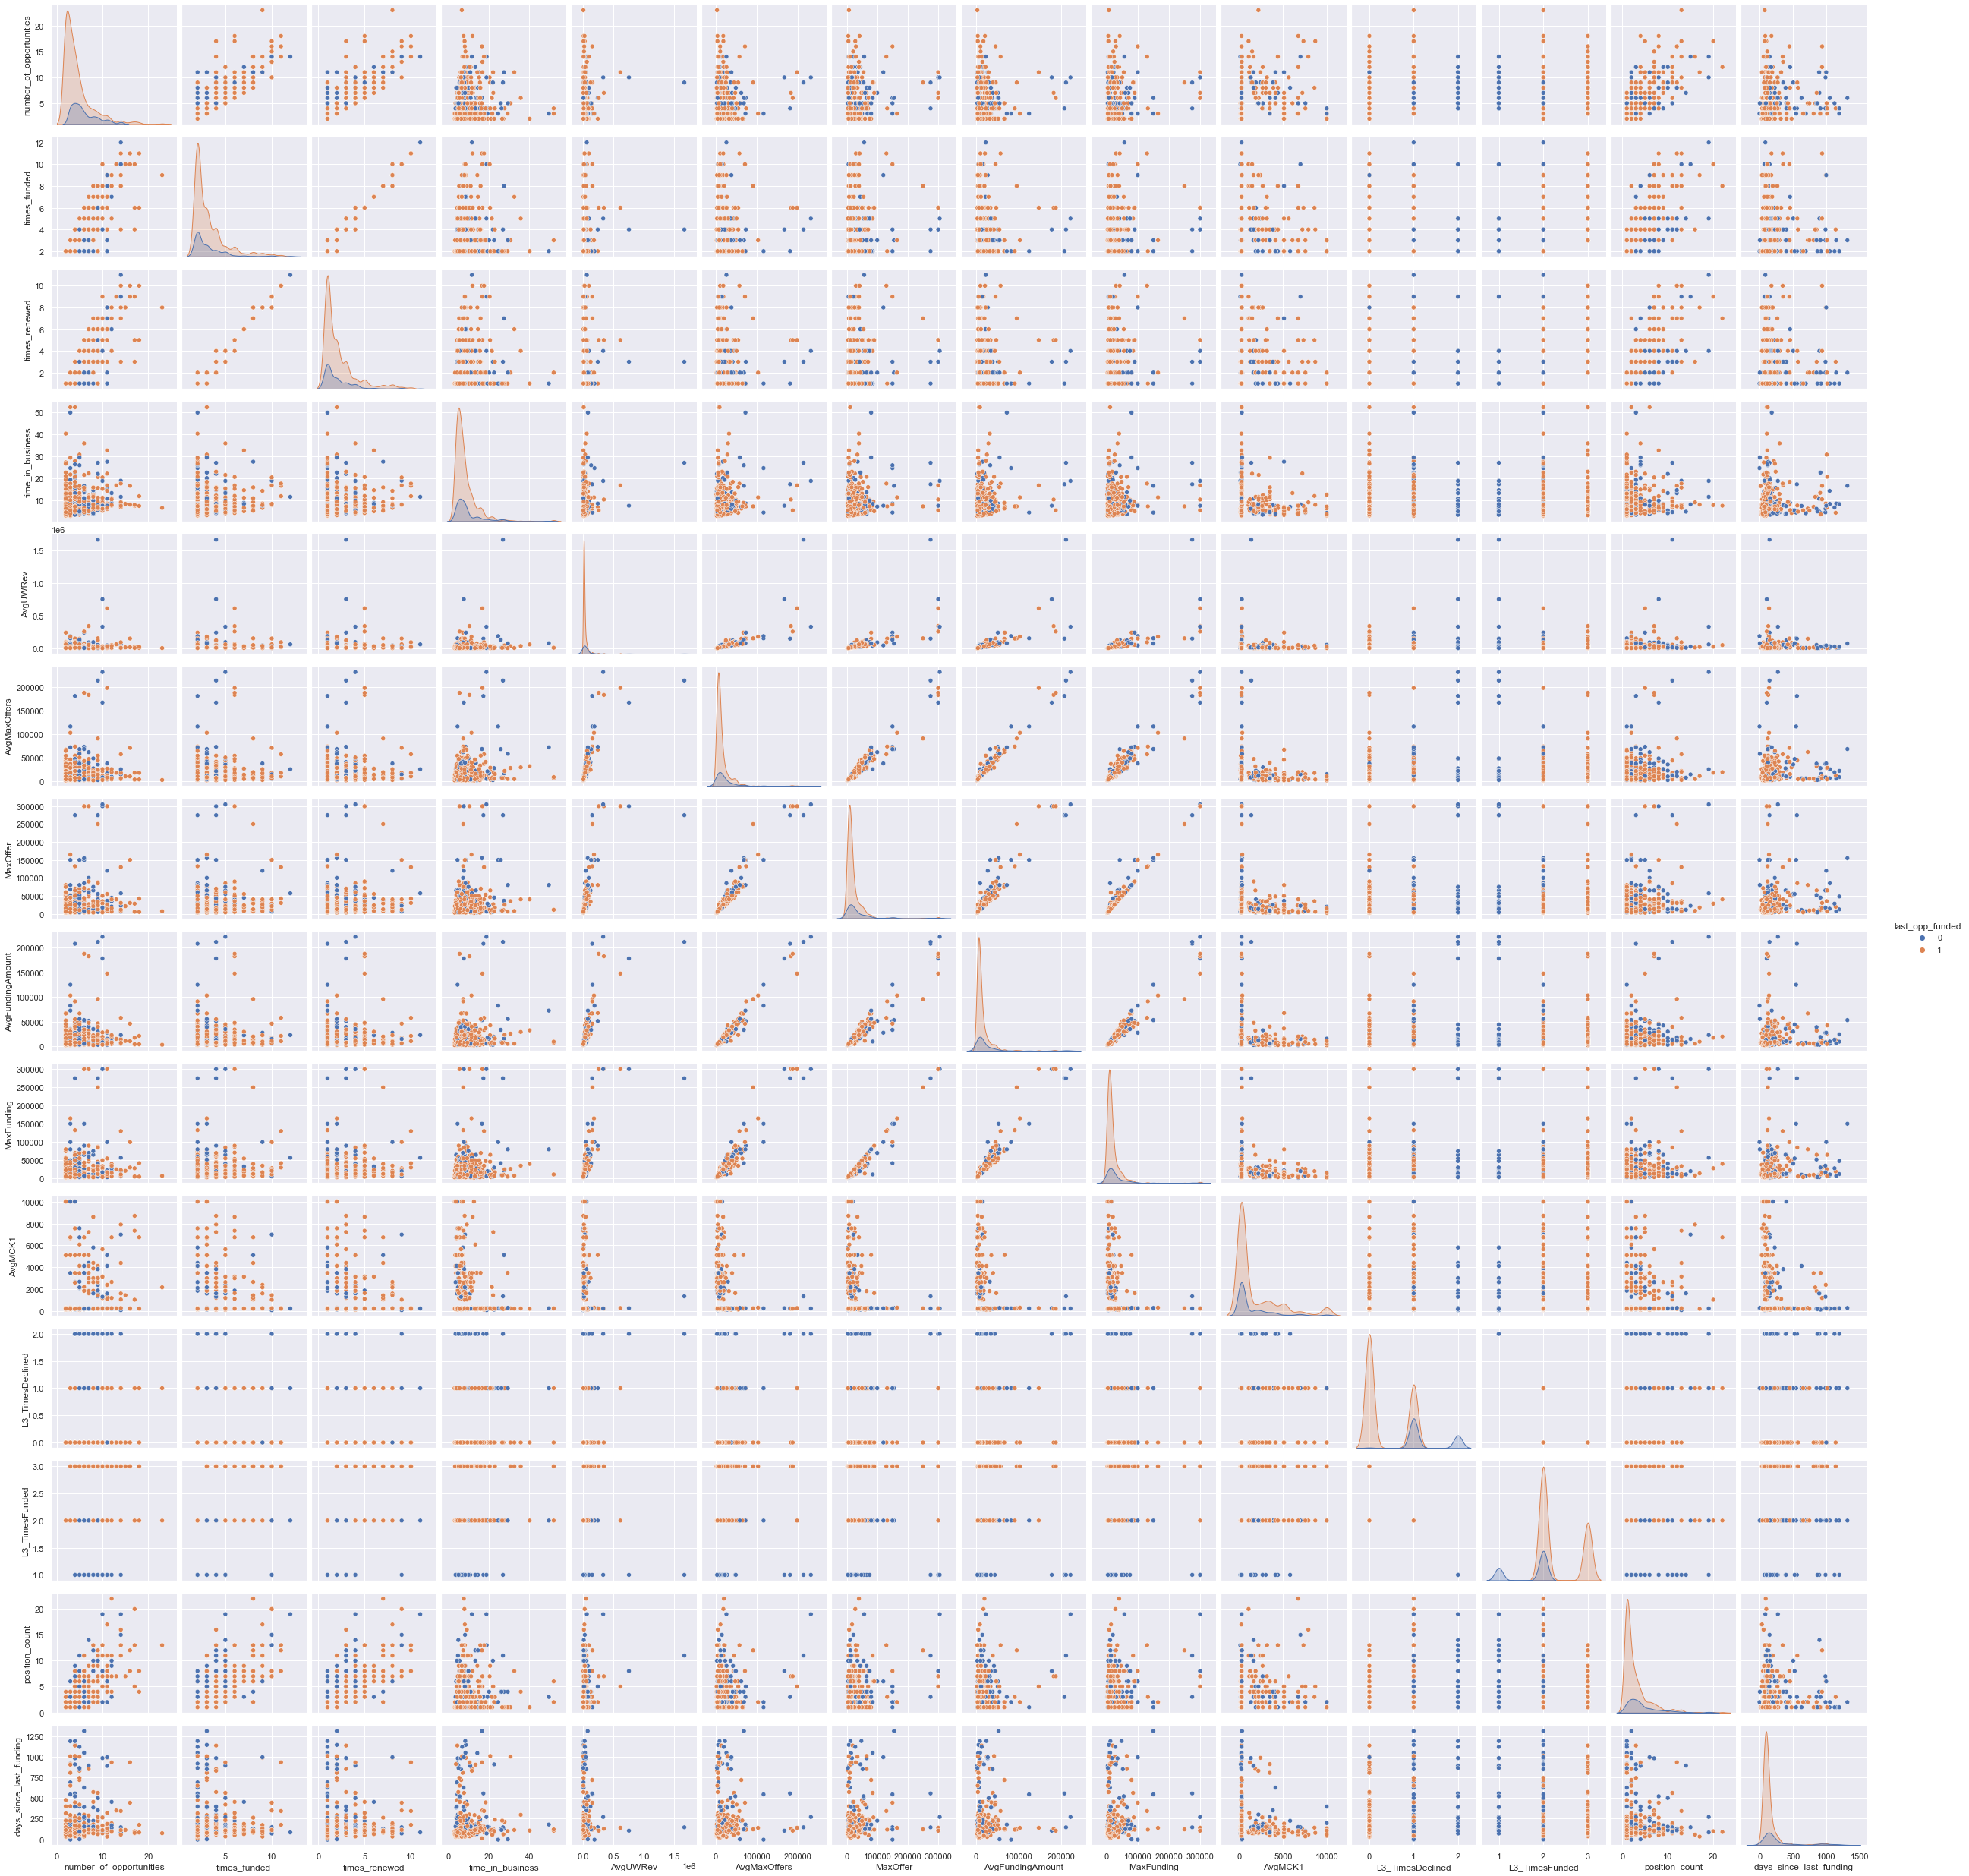

In [17]:
eb_df2 = eb_df[['accountid', 'account_owner_name__c', 'business_type',
       'number_of_opportunities', 'times_funded', 'times_renewed',
       'time_in_business', 'AvgUWRev', 'AvgMaxOffers', 'MaxOffer',
       'AvgFundingAmount', 'MaxFunding', 'AvgMCK1', 'L3_TimesDeclined',
       'L3_TimesFunded', 'position_count', 'days_since_last_funding',
       'last_opp_funded']]

g = sns.pairplot(eb_df2, hue= 'last_opp_funded', diag_kws={'bw': 0.2})

In [18]:
corr = eb_df2.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,number_of_opportunities,times_funded,times_renewed,time_in_business,AvgUWRev,AvgMaxOffers,MaxOffer,AvgFundingAmount,MaxFunding,AvgMCK1,L3_TimesDeclined,L3_TimesFunded,position_count,days_since_last_funding,last_opp_funded
number_of_opportunities,1.00,0.82,0.82,0.16,0.13,0.13,0.20,0.12,0.19,0.04,0.28,0.08,0.73,0.15,-0.19
times_funded,0.82,1.00,1.00,0.16,0.09,0.14,0.22,0.12,0.21,-0.08,-0.05,0.35,0.74,0.11,-0.01
times_renewed,0.82,1.00,1.00,0.16,0.10,0.14,0.22,0.13,0.22,-0.08,-0.05,0.35,0.74,0.11,-0.01
time_in_business,0.16,0.16,0.16,1.00,0.17,0.22,0.20,0.21,0.18,-0.20,0.05,0.04,0.15,0.09,-0.09
AvgUWRev,0.13,0.09,0.10,0.17,1.00,0.76,0.72,0.75,0.72,-0.07,0.15,-0.12,0.20,0.03,-0.16
AvgMaxOffers,0.13,0.14,0.14,0.22,0.76,1.00,0.97,0.98,0.96,-0.18,0.14,-0.08,0.25,0.12,-0.19
MaxOffer,0.20,0.22,0.22,0.20,0.72,0.97,1.00,0.95,0.98,-0.18,0.13,-0.04,0.29,0.16,-0.20
AvgFundingAmount,0.12,0.12,0.13,0.21,0.75,0.98,0.95,1.00,0.97,-0.17,0.14,-0.08,0.24,0.11,-0.17
MaxFunding,0.19,0.21,0.22,0.18,0.72,0.96,0.98,0.97,1.00,-0.17,0.12,-0.04,0.28,0.14,-0.16
AvgMCK1,0.04,-0.08,-0.08,-0.20,-0.07,-0.18,-0.18,-0.17,-0.17,1.00,0.06,-0.05,-0.05,-0.15,0.05


In [19]:
eb_df.drop(['accountid','account_owner_name__c', 'business_type', 'times_renewed', 'AvgMaxOffers', 'AvgFundingAmount', 'MaxFunding'], axis=1, inplace=True)

In [20]:
#eb_df.drop(['accountid','account_owner_name__c', 'business_type'], axis=1, inplace=True)

In [21]:
eb_df.columns

Index(['number_of_opportunities', 'times_funded', 'time_in_business',
       'AvgUWRev', 'MaxOffer', 'AvgMCK1', 'L3_TimesDeclined', 'L3_TimesFunded',
       'position_count', 'days_since_last_funding', 'last_opp_funded'],
      dtype='object')

In [22]:
#scale_vars = ['number_of_opportunities', 'times_funded', 'time_in_business', 'AvgUWRev', 'MaxOffer', 'AvgMCK1', 'L3_TimesDeclined', 'L3_TimesFunded', 'position_count', 'days_since_last_funding','times_renewed', 'AvgMaxOffers', 'AvgFundingAmount', 'MaxFunding']
scale_vars = ['number_of_opportunities', 'times_funded', 'time_in_business',
       'AvgUWRev', 'MaxOffer', 'AvgMCK1', 'L3_TimesDeclined', 'L3_TimesFunded',
       'position_count', 'days_since_last_funding', 'last_opp_funded']
scaler = MinMaxScaler()
eb_df[scale_vars] = scaler.fit_transform(eb_df[scale_vars])
eb_df.head()

,number_of_opportunities,times_funded,time_in_business,AvgUWRev,MaxOffer,AvgMCK1,L3_TimesDeclined,L3_TimesFunded,position_count,days_since_last_funding,last_opp_funded
0,0.047619,0.0,0.048880,0.002043,0.014851,0.010973,0.5,0.5,0.000000,0.083333,1.0
1,0.190476,0.3,0.252546,0.018422,0.108911,0.012491,0.0,1.0,0.238095,0.077273,1.0
3,0.047619,0.0,0.030550,0.091446,0.488449,0.016199,0.5,0.5,0.000000,0.416667,0.0
5,0.047619,0.1,0.073320,0.009807,0.042904,0.014008,0.0,1.0,0.000000,0.115152,1.0
6,0.571429,0.7,0.079430,0.004147,0.018152,0.153021,0.0,1.0,0.476190,0.057576,1.0


In [23]:
X= eb_df.drop("last_opp_funded",axis=1)
y= eb_df["last_opp_funded"]
print(f'X shape: {np.shape(X)}')
print(f'y shape: {np.shape(y)}')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

X shape: (563, 10)
y shape: (563,)


In [24]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

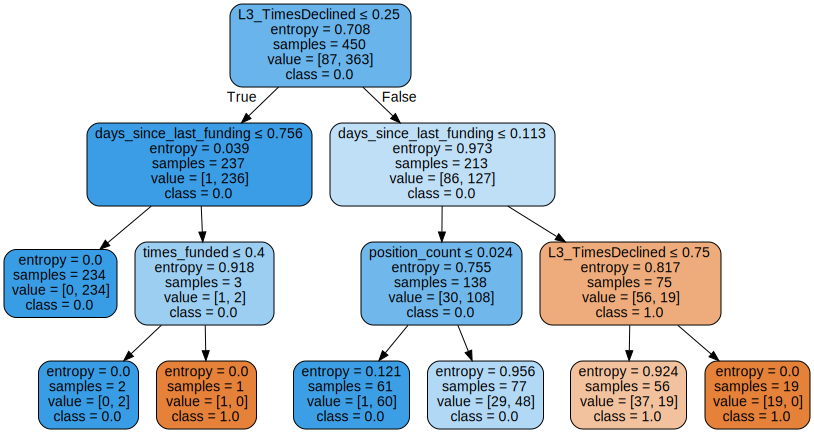

In [25]:
import graphviz

dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=eb_df.drop("last_opp_funded",axis=1).columns,
                                class_names=eb_df['last_opp_funded'].unique().astype(str),
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [26]:
# Calculating FI
for i, column in enumerate(eb_df.drop('last_opp_funded', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi


# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()
final_fi

Importance of feature number_of_opportunities:, 0.000
Importance of feature times_funded:, 0.015
Importance of feature time_in_business:, 0.000
Importance of feature AvgUWRev:, 0.000
Importance of feature MaxOffer:, 0.000
Importance of feature AvgMCK1:, 0.000
Importance of feature L3_TimesDeclined:, 0.600
Importance of feature L3_TimesFunded:, 0.000
Importance of feature position_count:, 0.125
Importance of feature days_since_last_funding:, 0.260


,index,Variable,Feature Importance Score
0,6,L3_TimesDeclined,0.600085
1,9,days_since_last_funding,0.259910
2,8,position_count,0.125200
3,1,times_funded,0.014805
4,0,number_of_opportunities,0.000000
5,2,time_in_business,0.000000
6,3,AvgUWRev,0.000000
7,4,MaxOffer,0.000000
8,5,AvgMCK1,0.000000
9,7,L3_TimesFunded,0.000000


In [27]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.8911111111111111
Testing Accuracy is:  0.8230088495575221


In [28]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('Actuals')
    plt.xlabel('Predicted')

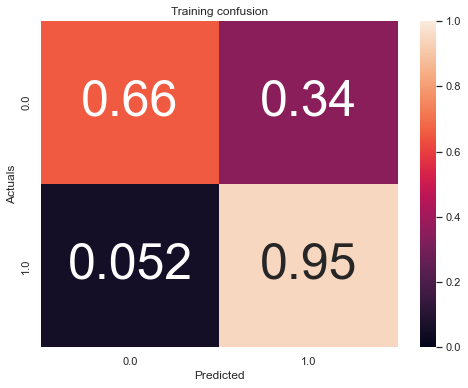

In [29]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

In [30]:
y_pred = dt.predict(X_train)
y_pred
confusion_matrix(y_train, y_pred)

array([[ 57,  30],
       [ 19, 344]], dtype=int64)

In [55]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas =ccp_alphas[:-1]

dts = []
for ccp_alpha in ccp_alphas:
 dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
 dt.fit(X_train, y_train)
 dts.append(dt)

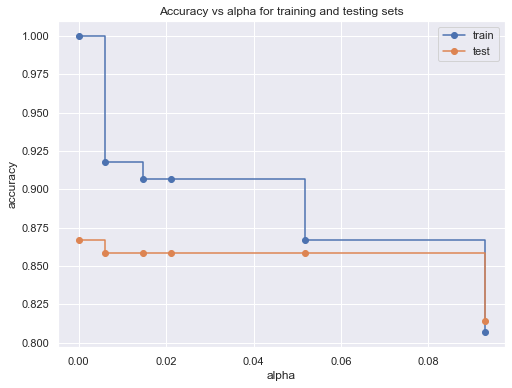

In [58]:
train_scores = [dt.score(X_train, y_train) for dt in dts]
test_scores = [dt.score(X_test, y_test) for dt in dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='alpha'>

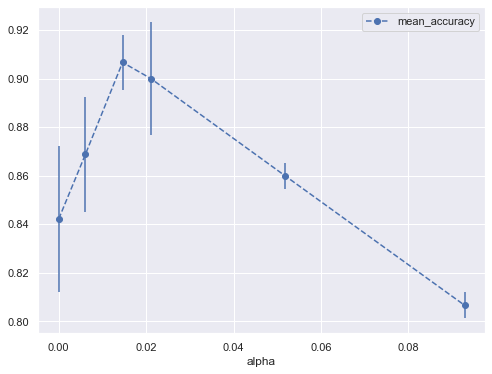

In [60]:
from sklearn.model_selection import cross_val_score

alpha_loop_values = []
for ccp_alpha in ccp_alphas:
 dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
 scores = cross_val_score(dt, X_train, y_train, cv=5)
 alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns= ['alpha','mean_accuracy', 'std'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

In [63]:
alpha_results[(alpha_results['alpha'] >0.01) & (alpha_results['alpha'] <0.02)]

,alpha,mean_accuracy,std
2,0.014608,0.906667,0.011331


In [65]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] >0.01) & (alpha_results['alpha'] <0.02)]['alpha']
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014607784082954187

In [80]:
dt_pruned = DecisionTreeClassifier(criterion='entropy',random_state=42, ccp_alpha=ideal_ccp_alpha)
dt_pruned = dt_pruned.fit(X_train, y_train)
prediction_test = dt_pruned.predict(X=X_test)

Training Accuracy is:  0.9066666666666666
Testing Accuracy is:  0.8584070796460177


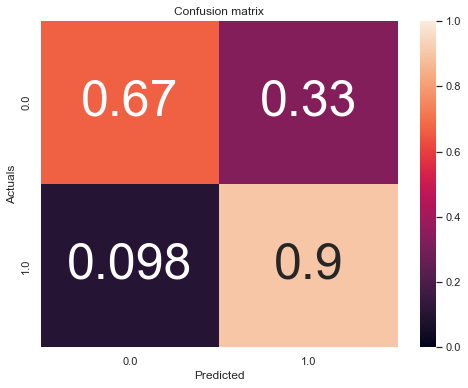

In [81]:
# Accuracy on Train
print("Training Accuracy is: ", dt_pruned.score(X_train, y_train))
# Accuracy on Test
print("Testing Accuracy is: ", dt_pruned.score(X_test, y_test))

#plot_confusion_matrix(dt_pruned, X_test, y_test)
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt_pruned.classes_)

Training Accuracy is:  1.0
Testing Accuracy is:  0.8672566371681416


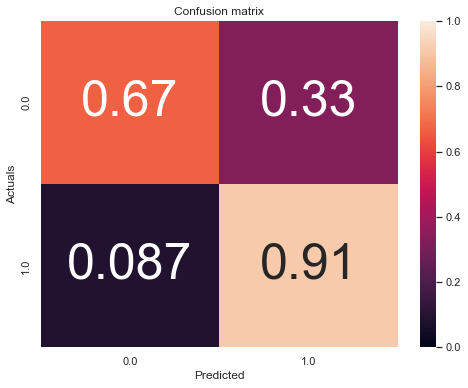

In [31]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.867
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.823
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.823
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.858
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.858
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.876
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.858
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.841
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.876
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.876
Classification accuracy on test set with max features = log2 and max_depth = None: 0.876
Classification accuracy on test set with max features = log2

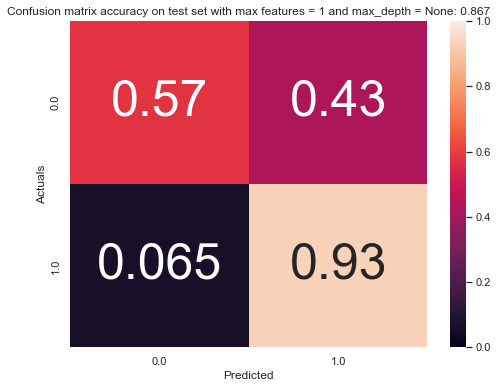

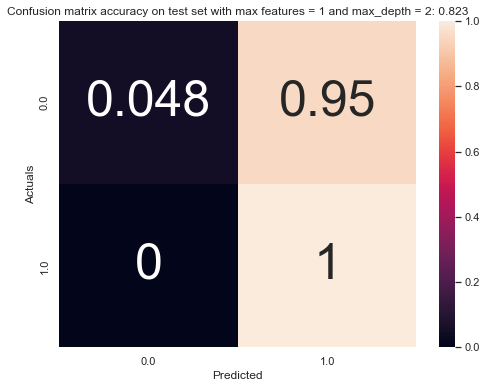

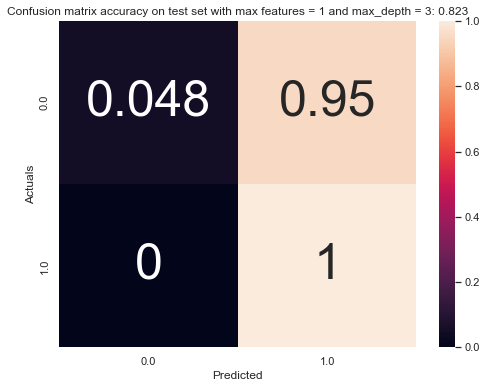

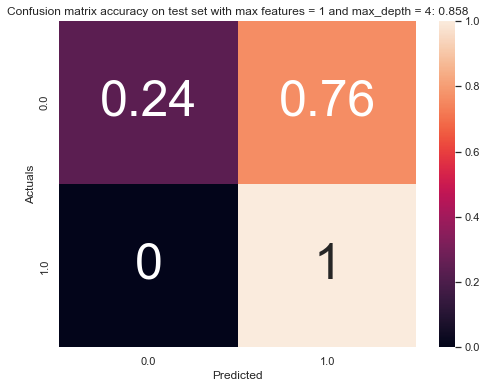

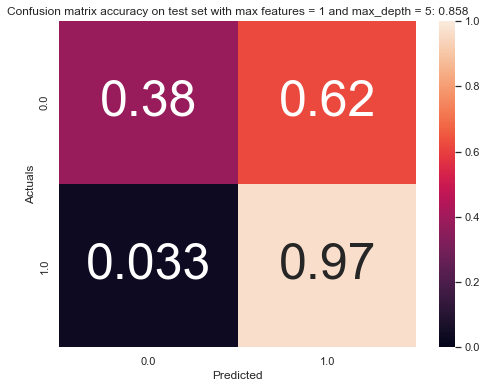

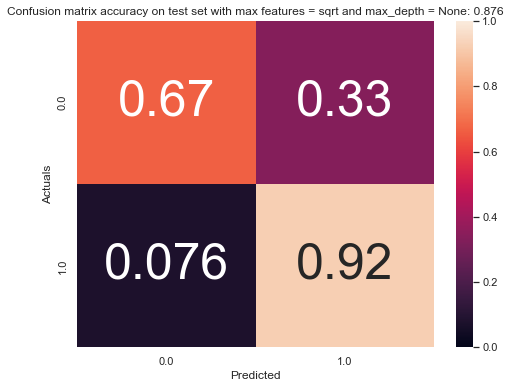

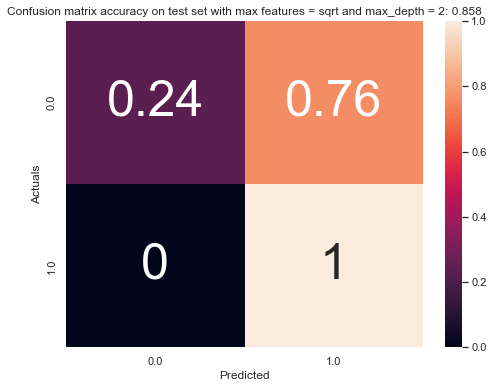

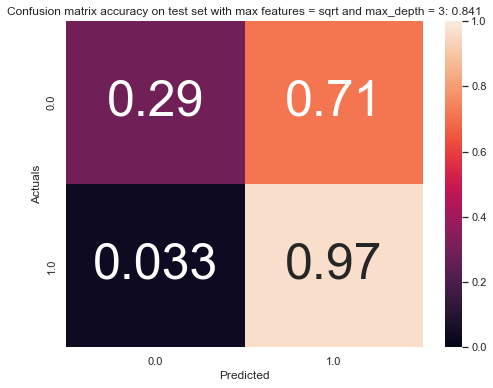

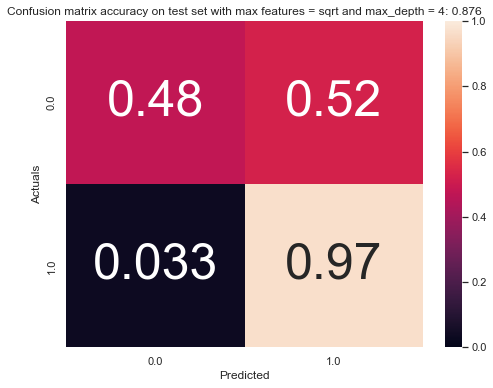

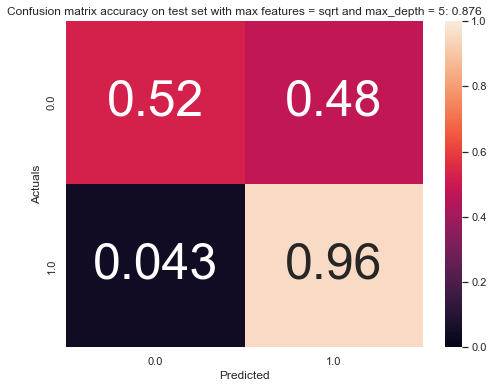

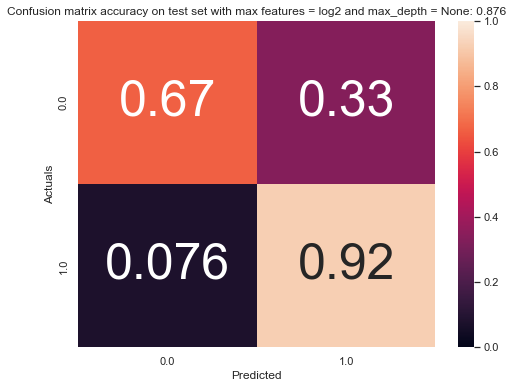

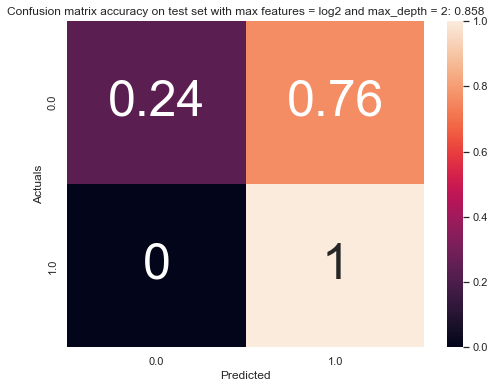

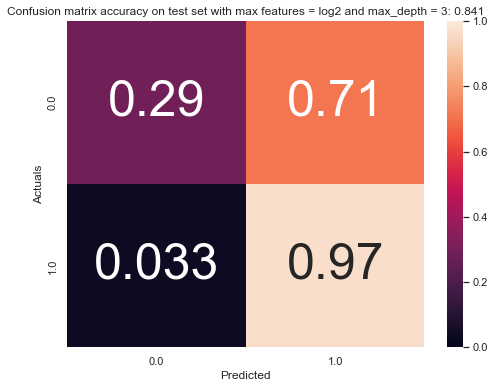

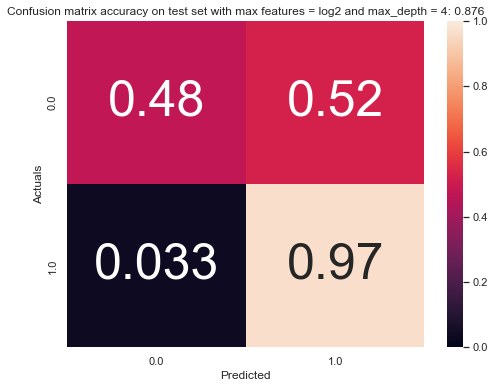

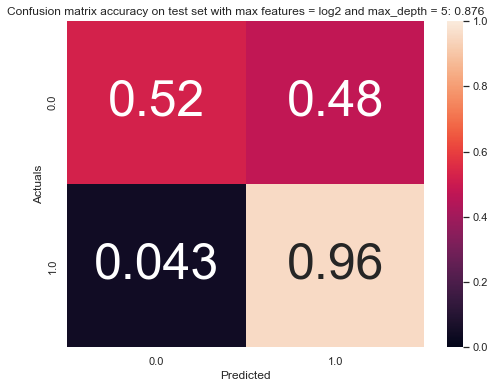

In [53]:
# Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths):
    rf = RandomForestClassifier(n_estimators=n_estimators,
                                criterion='entropy',
                                max_features=f,
                                max_depth=d,
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

In [33]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier(tree_method='auto')

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3, error_score='raise')

# fitting it
clf.fit(X,y)

# best parameters
# clf.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.933 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.930 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.942 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.964 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.929 total time=   0.0s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7;, score=0.906 total time=   0.0s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7;, score=0.901 total time=   0.0s
[CV 3/5] END colsample_

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [2, 3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [34]:
clf.best_params_

{'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [35]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [36]:
clf.best_estimator_.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0.4,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 12,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'auto',
 'validate_parameters': 1,
 'verbosity': None}

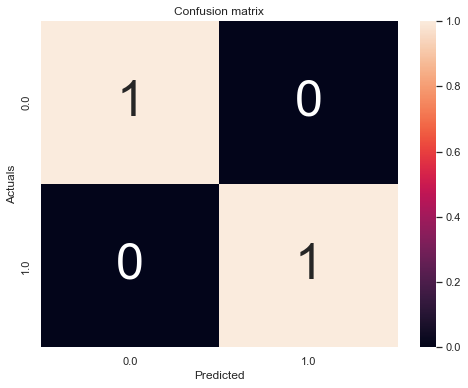

In [82]:
# fiting the model with the best parameters

final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1,
              sampling_method= 'uniform', scale_pos_weight = 1, subsample = 1,
              tree_method = 'auto', validate_parameters= 1, verbosity= None)

# fitting
final_model.fit(X,y)

pred_xgboost = final_model.predict(X)

# Confusion Matrix
cm = confusion_matrix(y, pred_xgboost)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

In [84]:
# Accuracy on Test
print("Training Accuracy is: ", final_model.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", final_model.score(X_test, y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  1.0


In [38]:
qa22_df.head()

,accountid,account_owner_name__c,business_type,number_of_opportunities,times_funded,times_renewed,time_in_business,AvgUWRev,AvgMaxOffers,MaxOffer,AvgFundingAmount,MaxFunding,AvgMCK1,AvgMCK3,L3_TimesDeclined,L3_TimesFunded,position_count,days_since_last_funding,last_opp_funded
0,001f100001Hd7aUAAR,Arnold de Oleo,EB,13,10,9,10.2,14500.000000,13975.000000,40000.0,13975.000000,40000.0,994.923077,290.0,1,2,11,104,0
1,0013Z00001hacawQAA,Oliver Rodriguez,EB,8,5,4,3.1,52857.142857,35714.285714,78000.0,31666.666667,78000.0,1642.714286,380.0,0,3,4,125,1
2,0013Z00001eJpFWQA0,Edwin Reyes,EB,8,5,4,7.6,21714.285714,16214.285714,26000.0,14416.666667,26000.0,250.714286,360.0,0,3,6,145,1
3,0013Z00001nnqFHQAY,Ruben Antuna,EB,5,3,2,2.7,24166.666667,24916.666667,30000.0,19000.000000,30000.0,271.250000,345.0,1,2,4,41,0
4,0013Z00001pcVQDQA2,Arnold de Oleo,EB,5,3,2,2.7,14625.000000,9653.333333,15000.0,9653.333333,15000.0,205.000000,317.5,1,2,3,89,1


In [39]:
#eb_22 = qa22_df[['number_of_opportunities', 'times_funded', 'time_in_business', 'AvgUWRev', 'MaxOffer', 'AvgMCK1', 'L3_TimesDeclined', 'L3_TimesFunded', 'position_count', 'days_since_last_funding','times_renewed', 'AvgMaxOffers', 'AvgFundingAmount', 'MaxFunding']]
eb_22 = qa22_df[['number_of_opportunities', 'times_funded', 'time_in_business',
       'AvgUWRev', 'MaxOffer', 'AvgMCK1', 'L3_TimesDeclined', 'L3_TimesFunded',
       'position_count', 'days_since_last_funding']]

In [40]:
#scale_vars = ['number_of_opportunities', 'times_funded', 'time_in_business', 'AvgUWRev', 'MaxOffer', 'AvgMCK1', 'L3_TimesDeclined', 'L3_TimesFunded', 'position_count', 'days_since_last_funding','times_renewed', 'AvgMaxOffers', 'AvgFundingAmount', 'MaxFunding']
scale_vars = ['number_of_opportunities', 'times_funded', 'time_in_business',
       'AvgUWRev', 'MaxOffer', 'AvgMCK1', 'L3_TimesDeclined', 'L3_TimesFunded',
       'position_count', 'days_since_last_funding']
eb_22[scale_vars] = scaler.fit_transform(eb_22[scale_vars])
eb_22.head()

,number_of_opportunities,times_funded,time_in_business,AvgUWRev,MaxOffer,AvgMCK1,L3_TimesDeclined,L3_TimesFunded,position_count,days_since_last_funding
0,0.44,0.600000,0.236534,0.012237,0.075377,0.120713,0.5,0.5,0.256410,0.512500
1,0.24,0.266667,0.070258,0.053052,0.151759,0.209079,0.0,1.0,0.076923,0.600000
2,0.24,0.266667,0.175644,0.019914,0.047236,0.019195,0.0,1.0,0.128205,0.683333
3,0.12,0.133333,0.060890,0.022523,0.055276,0.021996,0.5,0.5,0.076923,0.250000
4,0.12,0.133333,0.060890,0.012370,0.025126,0.012959,0.5,0.5,0.051282,0.450000


In [41]:
# 9.3. Making predictions

pred_xgboost = final_model.predict(eb_22.values)
pred_prob_xgboost = final_model.predict_proba(eb_22.values)

pred_xgboost

array([1, 1, 1, ..., 1, 1, 1])

In [42]:
# probabilities
predictions_output = pred_prob_xgboost.round(2)
predictions_output10 = pred_xgboost

In [43]:
predictions_output

array([[0.36, 0.64],
       [0.01, 0.99],
       [0.01, 0.99],
       ...,
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.5 , 0.5 ]], dtype=float32)

In [44]:
qa22_df['Predictions - Renew or Not'] = predictions_output10

In [45]:
qa22_df['Probability to Renew'] = predictions_output[:, 1].tolist()

In [46]:
qa22_df['Prediction Description'] = 'Empty'

In [47]:
qa22_df['Prediction Description'][qa22_df['Predictions - Renew or Not'] == 0] = 'No Renew'

In [48]:
qa22_df['Prediction Description'][qa22_df['Predictions - Renew or Not'] == 1] = 'Renew'

In [49]:
qa22_df

,accountid,account_owner_name__c,business_type,number_of_opportunities,times_funded,times_renewed,time_in_business,AvgUWRev,AvgMaxOffers,MaxOffer,...,AvgMCK1,AvgMCK3,L3_TimesDeclined,L3_TimesFunded,position_count,days_since_last_funding,last_opp_funded,Predictions - Renew or Not,Probability to Renew,Prediction Description
0,001f100001Hd7aUAAR,Arnold de Oleo,EB,13,10,9,10.2,14500.000000,13975.000000,40000.0,...,994.923077,290.000000,1,2,11,104,0,1,0.64,Renew
1,0013Z00001hacawQAA,Oliver Rodriguez,EB,8,5,4,3.1,52857.142857,35714.285714,78000.0,...,1642.714286,380.000000,0,3,4,125,1,1,0.99,Renew
2,0013Z00001eJpFWQA0,Edwin Reyes,EB,8,5,4,7.6,21714.285714,16214.285714,26000.0,...,250.714286,360.000000,0,3,6,145,1,1,0.99,Renew
3,0013Z00001nnqFHQAY,Ruben Antuna,EB,5,3,2,2.7,24166.666667,24916.666667,30000.0,...,271.250000,345.000000,1,2,4,41,0,0,0.39,No Renew
4,0013Z00001pcVQDQA2,Arnold de Oleo,EB,5,3,2,2.7,14625.000000,9653.333333,15000.0,...,205.000000,317.500000,1,2,3,89,1,1,0.60,Renew
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,0015e00000de2bGAAQ,David Brongkoll,EB,2,2,1,3.3,11750.000000,12475.000000,15700.0,...,275.000000,370.000000,0,2,1,129,1,1,0.99,Renew
1317,0015e00000VufgyAAB,Walter Taveras MCK,EB,3,2,1,4.0,13333.333333,14000.000000,17500.0,...,216.666667,356.666667,1,2,2,161,1,0,0.19,No Renew
1318,0015e00000gdcXYAAY,Ruben Antuna,EB,2,2,1,5.6,12750.000000,12500.000000,13000.0,...,245.000000,395.000000,0,2,1,118,1,1,1.00,Renew
1319,0015e00000jIkYUAA0,Alex Tejada,EB,2,2,1,2.9,13250.000000,8125.000000,8500.0,...,222.500000,300.000000,0,2,1,70,1,1,1.00,Renew


In [93]:
quartile = qa22_df['Probability to Renew'].quantile([0.25,.5,.75])

In [100]:
quartile

0.25    0.44
0.50    0.91
0.75    0.99
Name: Probability to Renew, dtype: float64

In [94]:
qa22_df['Quality']= 'Empty'

In [101]:
qa22_df['Quality'][qa22_df['Probability to Renew']>quartile[0.75]] = 'A'

In [102]:
qa22_df['Quality'][qa22_df['Probability to Renew']>quartile[0.5]] = 'B'

In [103]:
qa22_df['Quality'][qa22_df['Probability to Renew']>quartile[0.25]] = 'C'

In [104]:
qa22_df['Quality'][qa22_df['Probability to Renew']<quartile[0.25]] = 'D'

In [105]:
qa22_df

,accountid,account_owner_name__c,business_type,number_of_opportunities,times_funded,times_renewed,time_in_business,AvgUWRev,AvgMaxOffers,MaxOffer,...,AvgMCK3,L3_TimesDeclined,L3_TimesFunded,position_count,days_since_last_funding,last_opp_funded,Predictions - Renew or Not,Probability to Renew,Prediction Description,Quality
0,001f100001Hd7aUAAR,Arnold de Oleo,EB,13,10,9,10.2,14500.000000,13975.000000,40000.0,...,290.000000,1,2,11,104,0,1,0.64,Renew,C
1,0013Z00001hacawQAA,Oliver Rodriguez,EB,8,5,4,3.1,52857.142857,35714.285714,78000.0,...,380.000000,0,3,4,125,1,1,0.99,Renew,C
2,0013Z00001eJpFWQA0,Edwin Reyes,EB,8,5,4,7.6,21714.285714,16214.285714,26000.0,...,360.000000,0,3,6,145,1,1,0.99,Renew,C
3,0013Z00001nnqFHQAY,Ruben Antuna,EB,5,3,2,2.7,24166.666667,24916.666667,30000.0,...,345.000000,1,2,4,41,0,0,0.39,No Renew,D
4,0013Z00001pcVQDQA2,Arnold de Oleo,EB,5,3,2,2.7,14625.000000,9653.333333,15000.0,...,317.500000,1,2,3,89,1,1,0.60,Renew,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,0015e00000de2bGAAQ,David Brongkoll,EB,2,2,1,3.3,11750.000000,12475.000000,15700.0,...,370.000000,0,2,1,129,1,1,0.99,Renew,C
1317,0015e00000VufgyAAB,Walter Taveras MCK,EB,3,2,1,4.0,13333.333333,14000.000000,17500.0,...,356.666667,1,2,2,161,1,0,0.19,No Renew,D
1318,0015e00000gdcXYAAY,Ruben Antuna,EB,2,2,1,5.6,12750.000000,12500.000000,13000.0,...,395.000000,0,2,1,118,1,1,1.00,Renew,C
1319,0015e00000jIkYUAA0,Alex Tejada,EB,2,2,1,2.9,13250.000000,8125.000000,8500.0,...,300.000000,0,2,1,70,1,1,1.00,Renew,C
